# Concevez une application au service de la sant√© publique

Objectifs: 
-  Traiter le jeu de donn√©es afin de rep√©rer des variables pertinentes pour les traitements √† venir. Automatiser ces traitements pour √©viter de r√©p√©ter ces op√©rations. Le programme doit fonctionner si la base de donn√©es est l√©g√®rement modifi√©e (ajout d‚Äôentr√©es, par exemple). 
- Tout au long de l‚Äôanalyse, produire des visualisations afin de mieux comprendre les donn√©es. Effectuer une analyse univari√©e pour chaque variable int√©ressante, afin de synth√©tiser son comportement. L‚Äôappel √† projets sp√©cifie que l‚Äôanalyse doit √™tre simple √† comprendre pour un public n√©ophyte. Soyez donc attentif √† la lisibilit√© : taille des textes, choix des couleurs, nettet√© suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points‚Ä¶) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypoth√®ses  √† l‚Äôaide d‚Äôune analyse multivari√©e. Effectuer les tests statistiques appropri√©s pour v√©rifier la significativit√© des r√©sultats.
- √âlaborer une id√©e d‚Äôapplication. Identifier des arguments justifiant la faisabilit√© (ou non) de l‚Äôapplication √† partir des donn√©es Open Food Facts.
- R√©diger un rapport d‚Äôexploration et pitcher votre id√©e durant la soutenance du projet.

# Id√©e d'application

Les recommandations du PNNS sont les suivantes:
- Au moins 5 fruits et l√©gumes par jour
- Des f√©culents √† chaque repas selon l‚Äôapp√©tit
- 3 produits laitiers (lait, yaourt, fromage) par jour
- 1 √† 2 portions de viande, ≈ìufs et produits de la p√™che par jour
- Limiter les mati√®res grasses ajout√©es, le sucre et le sel

A partir d'un aliment scann√©, proposer une s√©lection de yaourt et/ou fruit(s) pour se rapprocher, sur le repas, des recommandations de sant√© en termes des apports en macronutriments:

* nutriments
    - lipides 35-40% Apports en Energie Totaux
    - protides 10-20% AET
    - glucides 40-55% AET
    - fibres: 30g (environ 2-3% AET)

On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'√©nergie, les apports en prot√©ines, lipides, glucides et fibres ainsi que les types d'aliments. Eventuellement, on pourra y ajouter le nutriscore et l'ecoscore pour pouvoir faire une s√©lection des produits les plus √©cologiques et sains (dans leur cat√©gorie).

# Sommaire
### [II Analyse exploratoire](#II-Analyse-exploratoire)
__[II.1 R√©partitions typiques de l'√©nergie et des macronutriments](#II.1-R√©partitions-typiques-de-l'√©nergie-et-des-macronutriments)__\
[II.1.1 R√©partition g√©n√©rale](#II.1.1-R√©partition-g√©n√©rale)\
[II.1.2 Les cat√©gories One-dish meals, Fruits et Milk and yogurt](#II.1.2-Les-cat√©gories-One-dish-meals,-Fruits-et-Milk-and-yogurt)\
[II.1.3 Repr√©sentation des proportions de chaque macronutriment dans le bilan global](#II.1.3-Repr√©sentation-des-proportions-de-chaque-macronutriment-dans-le-bilan-global)\
[II.1.4 Association d'un macronutriment dominant avec un groupe de produits](#II.1.4-Association-d'un-macronutriment-dominant-avec-un-groupe-de-produits)\
__[II.2 Scores](#II.2-Scores)__\
[II.2.1 Distance refl√©tant le (d√©s)√©quilibre entre les macronutriments: EquiScore](#II.2.1-Distance-refl√©tant-le-(d√©s)√©quilibre-entre-les-macronutriments:-EquiScore)\
[II.2.2 Distribution des valeurs du nutriscore](#II.2.2-Distribution-des-valeurs-du-nutriscore)\
[II.2.3 Analyse crois√©e des scores](#II.2.3-Analyse-crois√©e-des-scores)\
[II.2.4 EquiScore, Nutriscore et groupes d'aliments](#II.2.4-EquiScore,-Nutriscore-et-groupes-d'aliments)\
__[II.3 Analyse des corr√©lations](#II.3-Analyse-des-corr√©lations)__\
[II.3.1 Matrice des corr√©lations](#II.3.1-Matrice-des-corr√©lations)

# I Exploration du jeu de donn√©es et s√©lection des variables

## I.1 Chargement des donn√©es et s√©lection des variables

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno

# Module pour le scoring.
import functions_p3 as fp3

# II Analyse exploratoire

In [509]:
df1 = pd.read_csv("./df1_nomissing.csv")

## II.1 R√©partitions typiques de l'√©nergie et des macronutriments

### II.1.1 R√©partition g√©n√©rale

On commence par explorer les distributions associ√©es aux diff√©rents macronutriments et √† l'√©nergie sur le jeu de donn√©es global.

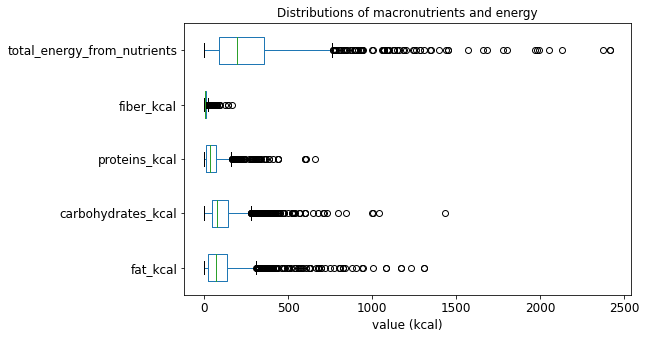

In [510]:
flierprops = {"marker":'o'}
ax=df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].plot(kind="box",
                                        vert=False, 
                                        showfliers=True,
                                        flierprops=flierprops,
                                        fontsize=12,
                                        xlabel="value (kcal)",
                                        figsize=(8, 5),
                                        title="Distributions of macronutrients and energy")
ax.set_xlabel("value (kcal)", fontsize=12)
plt.show()

In [511]:
df1.iloc[df1.fat_kcal.idxmax()]

product_name                   Le cassoulet au confit de canard de Castelnaud...
url                            http://world-en.openfoodfacts.org/product/3375...
categories_tags                en:canned-foods,en:meals,en:meat-based-product...
serving_quantity                                                            1580
pnns_groups_2                                                     One-dish meals
energy-kcal_100g                                                             153
fat_100g                                                                     9.2
nutrition-score-fr_100g                                                       -3
nutriscore_grade                                                               a
fiber_100g                                                                   4.7
proteins_100g                                                                9.5
carbohydrates_100g                                                           5.7
fat_kcal                    

Maintenant les valeurs typiques, sans les outliers.

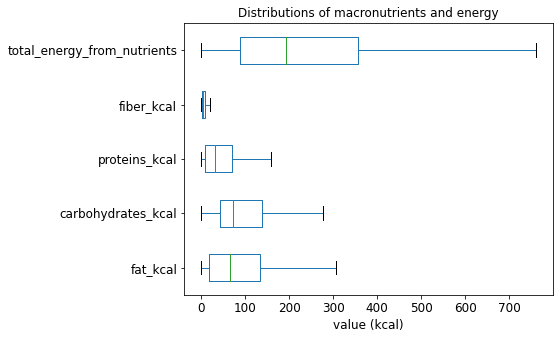

In [512]:
ax=df1[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutrients"]].plot(kind="box",
                                        vert=False, 
                                        showfliers=False,
                                        flierprops=flierprops,
                                        fontsize=12,
                                        xlabel="value (kcal)",
                                        figsize=(8, 5),
                                        title="Distributions of macronutrients and energy")
ax.set_xlabel("value (kcal)", fontsize=12)
plt.gcf().subplots_adjust(left=0.35, right=0.99)
plt.savefig("./graphes/general_distrib.png", dpi=300)
plt.show()

### II.1.2 Les cat√©gories One-dish meals, Fruits et Milk and yogurt

Combien de repr√©sentants de chaque cat√©gorie?

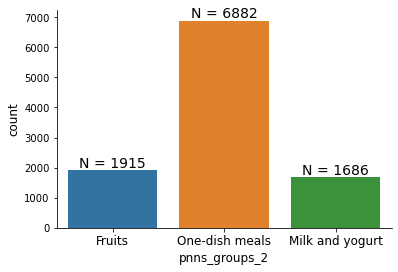

In [513]:
fig, ax = plt.subplots()
sns.countplot(x="pnns_groups_2",
              data=df1,
              ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xlabel(ax.get_xlabel(), fontsize=12)
ax.set_ylabel(ax.get_ylabel(), fontsize=12)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("N = {:.0f}".format(y), (x.mean(), y), 
            ha='center', va='bottom', fontsize=14) # set the alignment of the text
sns.despine(ax=ax)
plt.savefig("./graphes/categories.png", dpi=300)
plt.show()

Les One-dish meals sont largement surrepr√©sent√©s par rapport aux deux autres cat√©gories. Il faudra savoir en tenir compte. En attendant, regardons comment leur composition diff√®re.

### II.1.3 Repr√©sentation des proportions de chaque macronutriment dans le bilan global

On commence par cr√©er un dataframe regroupant les valeurs moyennes des macronutriments pour chaque groupe d'aliment. Comme les ANC ne reposent que sur les r√©partitions en lipides, glucides et prot√©ines (les fibres √©tant compt√©es √† part), on ne fera reposer l'analyse qui suit que sur les r√©partitions de ces macronutriments.

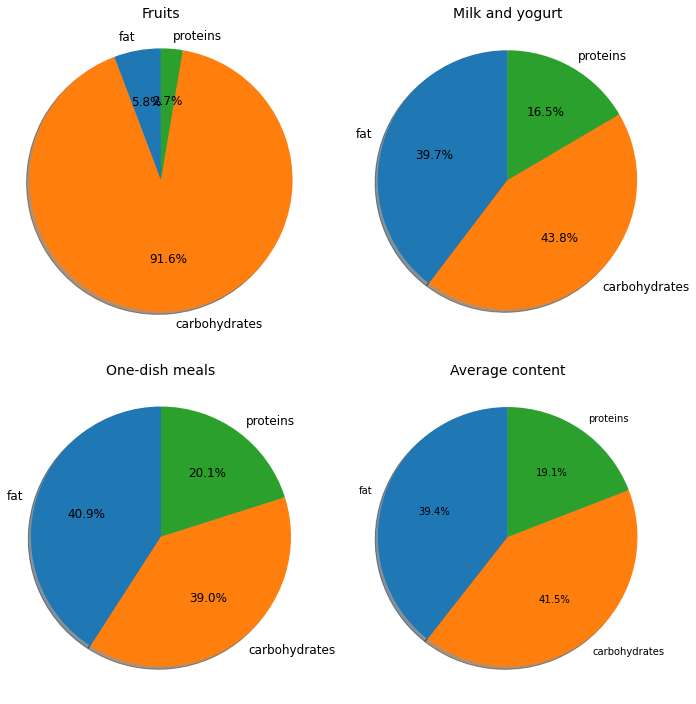

In [514]:
# On groupe les valeurs par cat√©gorie d'aliment.
gr = df1.groupby("pnns_groups_2")[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].mean()

# A titre de comparaison, on r√©cup√®re aussi les valeurs moyennes sur l'ensemble du dataset.
gen = df1[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].mean()

# On repr√©sente ces valeurs moyennes sous forme de proportion au bilan global pour chaque groupe d'aliment.
# Repr√©sentation sous forme de pie chart
labels = ["fat", "carbohydrates","proteins"]

# placement des titres
pad=0

# Taille de la police
fs = 14

txtprs = {"fontsize":12}

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.pie(gr.loc["Fruits"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Fruits", pad=pad, fontsize=fs)

ax2.pie(gr.loc["Milk and yogurt"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Milk and yogurt", pad=pad, fontsize=fs)

ax3.pie(gr.loc["One-dish meals"], textprops=txtprs, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("One-dish meals", pad=pad, fontsize=fs)

ax4.pie(gen, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Average content", pad=pad, fontsize=fs)


plt.tight_layout(pad=1.5)
plt.savefig("./graphes/pies.png")
plt.show()

Average content tr√®s proche de One-dish meals. Pas si √©tonnant si on regarde le nombre de one-dish meals par rapport aux autres groupes. A titre de comparaison, voici la r√©partition obtenue si on respecte les ANC:

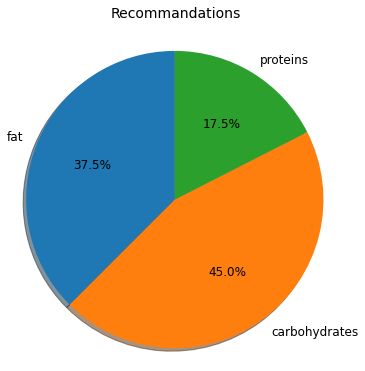

In [515]:
# Valeurs id√©ales
p_fat = 37.5 # fourchette de 35% √† 40%
p_carbs = 45 # fourchette de 40% √† 55%
p_prot = 17.5 # fourchette de 15% √† 20%

anc = [p_fat, p_carbs, p_prot]
labels = ["fat", "carbohydrates","proteins"]
txtprs = {"fontsize":12}

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(anc, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops=txtprs)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Recommandations", pad=20, fontsize=14)
plt.savefig("./graphes/anc.png")
plt.show()

Le contenu moyen est tr√®s proche des valeurs recommand√©es, mais on peut d√©j√† envisager l'utilit√© de ccombiner des plats de diff√©rentes natures pour parvenir √† un meilleur √©quilibre.

### II.1.4 Association d'un macronutriment dominant avec un groupe de produits

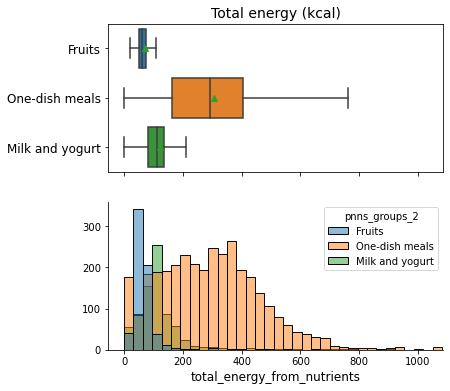

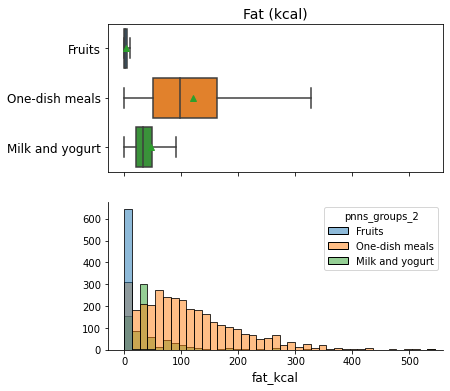

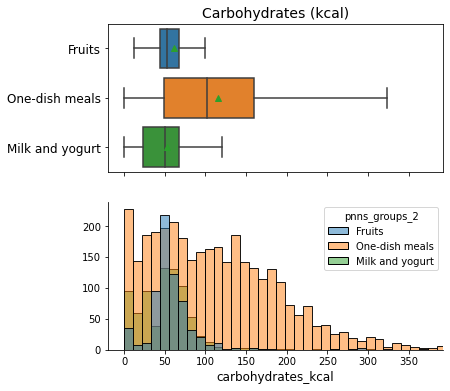

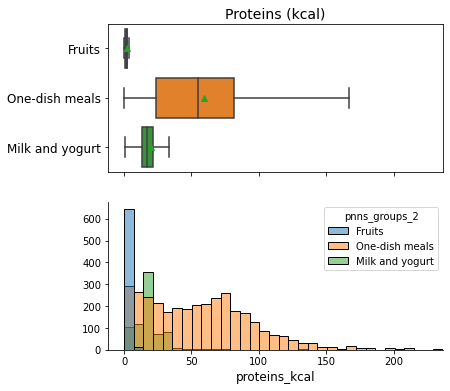

In [42]:
nutricols = ["total_energy_from_nutrients", "fat_kcal", "carbohydrates_kcal", "proteins_kcal"]
titles = {"total_energy_from_nutrients": "Total energy (kcal)",
          "fat_kcal": "Fat (kcal)",
          "carbohydrates_kcal": "Carbohydrates (kcal)",
          "proteins_kcal": "Proteins (kcal)"
         }

for c in nutricols:
    q = df1.groupby("pnns_groups_2")[c].quantile(0.99).max()
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 6), sharex=True)
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=df1,
                showfliers=False,
                showmeans=True,
                #palette="viridis",
                ax=ax1)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.tick_params(axis='y', labelsize=12)
    #ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
    ax1.set_xlim([-q/20, q])
    ax1.set_title(titles[c], fontsize=14)
    
    sns.histplot(x=c,
                 data=df1,
                 hue="pnns_groups_2",
                 ax=ax2
            )
    ax2.set_xlim([-q/20, q])
    ax2.set_xlabel(ax2.get_xlabel(), fontsize=12)
    ax1.tick_params(axis='x', labelsize=12)
    #ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)
    ax2.set_ylabel("")
    #ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=10)
    sns.despine(ax=ax2)
    plt.tight_layout
    plt.show()

Chaque groupe d'aliment est associ√© √† une pr√©sence plus forte, en moyenne, d'un ou plusieurs macronutriments. On peut ainsi effectuer les rapprochements suivants, sur la base des quelques analyses r√©alis√©es ci-dessus:
- les One-dish meals sont en g√©n√©ral les produits les plus √©nerg√©tiques, et constituent la source majeure de lipides et de prot√©ines,
- Les Fruits sont en g√©n√©ral la source majeure de fibres et de glucides,
- Les Milk and yogurt consituent une source interm√©diare de lipides et de prot√©ines, mais sont pauvres en glucides et en fibres.

Les recommandations de l'application pourront reposer sur ces constatations pour proposer, en association avec un one-dish meal d'un score donn√©, le meilleur "type" de produit en fonction des apports √† r√©duire ou √† augmenter dans la balance globale.

## II.2 Scores

### II.2.1 Distance refl√©tant le (d√©s)√©quilibre entre les macronutriments: EquiScore

Pour pouvoir r√©aliser notre id√©e d'application, il est n√©cessaire d'avoir un indicateur qui renseigne sur l'√©cart d'un produit aux valeurs id√©ales, en terme de fraction du contenu global. On choisit ainsi d'utiliser la distance euclidienne entre la composition d'un produit donn√© et la composition id√©ale.

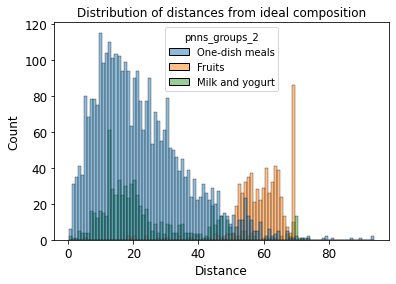

Some statistics about the distribution of distance from ideal composition:

All data:
Minimum: 0.33
Maximum: 93.81
Mean: 27.96
Median: 22.34
Standard deviation: 18.50
----------------------------------------
One-dish meals:
Minimum: 0.33
Maximum: 93.81
Mean: 22.45
Median: 19.93
Standard deviation: 13.76
----------------------------------------
Fruits:
Minimum: 5.65
Maximum: 68.83
Mean: 59.42
Median: 60.43
Standard deviation: 7.92
----------------------------------------
Milk and yogurt:
Minimum: 0.85
Maximum: 74.25
Mean: 25.34
Median: 19.70
Standard deviation: 16.40


In [516]:
X = df1.copy()
# On √©carte les lignes pour lesquelles toutes les variables valent 0
zeros = X[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].sum(axis=1)==0
drop_index = zeros[zeros].index

X.drop(index=drop_index, inplace=True)

# On cr√©e les nouvelles colonnes "fat_ratio", "carbohydrates_ratio" et "proteins_ratio" qui renseigneront sur 
# les ratio de macronutriments dans les contenus globaux.
X.loc[:, "fat_ratio"] = X.apply(lambda x: 100*x["fat_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)
X.loc[:, "carbohydrates_ratio"] = X.apply(lambda x: 100*x["carbohydrates_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)
X.loc[:, "proteins_ratio"] = X.apply(lambda x: 100*x["proteins_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]), axis=1)

sc = fp3.score(X["fat_ratio"], X["carbohydrates_ratio"], X["proteins_ratio"], method="sq")

# Nouvelle colonne "score" dans le dataframe
X.loc[:, "score"] = sc
X.head()

# mise √† jour du dataframe
df1 = X

# fontsize
fs=12

fig, ax = plt.subplots()
# Affichage de la distribution de l'equiscore
sns.histplot(x="score",
            data=X,
             hue="pnns_groups_2",
             bins=101,
             ax=ax
           )
plt.title("Distribution of distances from ideal composition", fontsize=fs)
plt.xlabel("Distance", fontsize=fs)
plt.ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
ax.tick_params(axis='x', labelsize=fs)
plt.savefig("./graphes/distances.png")
plt.show()

print("Some statistics about the distribution of distance from ideal composition:\n")
print("All data:")
print("Minimum: {:.2f}".format(X["score"].min()))
print("Maximum: {:.2f}".format(X["score"].max()))
print("Mean: {:.2f}".format(X["score"].mean()))
print("Median: {:.2f}".format(X["score"].median()))
print("Standard deviation: {:.2f}".format(X["score"].std()))
for i in X.pnns_groups_2.unique():
    print("-"*40)
    print(i+":")
    print("Minimum: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].min()[0]))
    print("Maximum: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].max()[0]))
    print("Mean: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].mean()[0]))
    print("Median: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].median()[0]))
    print("Standard deviation: {:.2f}".format(X.loc[X.pnns_groups_2==i, ["score"]].std()[0]))




Les distribution de distance pour les One-dish meals et les Milk and yogurt sont assez similaires. Elles diff√®rent en revanche franchement de la distribution pour les fruits, dont les scores sont regroup√©s vers les valeurs les plus √©lev√©es. La distance est li√©e aux "exc√®s" ou de fa√ßon √©quivalente aux "carences" d'une composition vis-√†-vis de la composition id√©ale. On va donc continuer d'explorer nos donn√©es en se concentrant sur les exc√®s en chacun des macronutriments.

In [517]:
X = df1.copy()

# On cr√©e trois nouvelles colonnes: "fat_excess", "carbohydrates_excess", "proteins_excess"
nutrient_cols = ["fat_excess", "carbohydrates_excess", "proteins_excess"]
X.loc[:, "fat_excess"] = X["fat_ratio"] - p_fat
X.loc[:, "carbohydrates_excess"] = X["carbohydrates_ratio"] - p_carbs
X.loc[:, "proteins_excess"] = X["proteins_ratio"] - p_prot

# On cr√©e trois nouvelles colonnes: "fat_excess", "carbohydrates_excess", "proteins_excess"
nutrient_cols = ["fat_excess", "carbohydrates_excess", "proteins_excess"]


# On peuple les colonnes "max_excess" et "min_excess" par le nom du macronutriment associ√© √† l'exc√®s le plus 
# √©lev√© en valeur alg√©brique, c'est-√†-dire qu'un exc√®s n√©gatif repr√©sente une carence.
X.loc[:, "max_excess"] = X[nutrient_cols].apply(lambda x: x.idxmax(), axis=1)
X.loc[:, "min_excess"] = X[nutrient_cols].apply(lambda x: x.idxmin(), axis=1)
X.loc[:, "max_excess_value"] = X[nutrient_cols].apply(lambda x: x.max(), axis=1)
X.loc[:, "min_excess_value"] = X[nutrient_cols].apply(lambda x: x.min(), axis=1)

# mise √† jour du dataframe
df1 = X

df1.head()

product_name  \
3                             Salade fusili   
4                                  Coleslaw   
5                          Chicken Burritos   
6  Salade Fusilli poulet tartare de l√©gumes   
7                            Salade Grecque   

                                                 url  \
3  http://world-en.openfoodfacts.org/product/0001...   
4  http://world-en.openfoodfacts.org/product/0001...   
5  http://world-en.openfoodfacts.org/product/0001...   
6  http://world-en.openfoodfacts.org/product/0001...   
7  http://world-en.openfoodfacts.org/product/0001...   

                                     categories_tags  serving_quantity  \
3  en:meals,en:pasta-dishes,en:salads,en:prepared...             215.0   
4                   en:meals,en:starters,en:coleslaw             150.0   
5              en:meals,en:salads,en:prepared-salads             306.0   
6  en:meals,en:pasta-dishes,en:salads,en:prepared...             265.0   
7              en:meals,en:salads,en:prepared-salads             315.0   

    pnns_groups_2  energy-kcal_100g   fat_100g  nutrition-score-fr_100g  \
3  One-dish meals        125.000000   3.500000                     -2.0   
4  One-dish meals        155.000000  12.500000                      1.0   
5  One-dish meals        202.020202   6.060606                      3.0   
6  One-dish meals         99.200000   2.300000                     -3.0   
7  One-dish meals         93.400000   7.100000                      3.0   

  nutriscore_grade  fiber_100g  ...  carbohydrates_ratio  proteins_ratio  \
3                a         1.3  ...            52.016461       22.057613   
4                b         2.5  ...            21.910488        2.939212   
5                c         0.9  ...            52.040816       20.408163   
6                a         1.7  ...            54.679285       23.554154   
7                c         1.0  ...             7.868852       22.295082   

       score  fat_excess  carbohydrates_excess  proteins_excess  \
3  14.281518  -11.574074              7.016461         4.557613   
4  46.504702   37.650301            -23.089512       -14.560788   
5  12.530471   -9.948980              7.040816         2.908163   
6  19.439198  -15.733438              9.679285         6.054154   
7  49.470558   32.336066            -37.131148         4.795082   

             max_excess            min_excess  max_excess_value  \
3  carbohydrates_excess            fat_excess          7.016461   
4            fat_excess  carbohydrates_excess         37.650301   
5  carbohydrates_excess            fat_excess          7.040816   
6  carbohydrates_excess            fat_excess          9.679285   
7            fat_excess  carbohydrates_excess         32.336066   

   min_excess_value  
3        -11.574074  
4        -23.089512  
5         -9.948980  
6        -15.733438  
7        -37.131148  

[5 rows x 30 columns]

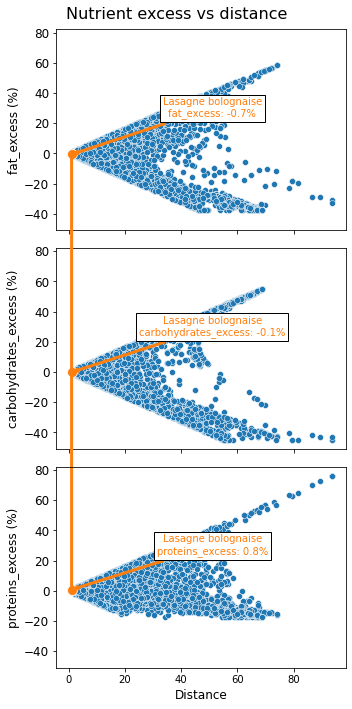

In [518]:
X = df1.copy()

from matplotlib.patches import ConnectionPatch

# placement du titre
pad = 12

# taille de la police
fs = 12

# choix d'un nombre al√©atoire compris entre 0 et len(X)
np.random.seed(3)
r = np.random.choice(X[(X.score>20)&(X.score<40)].shape[0], 1)
product = X.iloc[r]

fig, axs = plt.subplots(nrows=len(nutrient_cols), figsize=(5, 10), sharex=True, sharey=True)
fig.suptitle("Nutrient excess vs distance", fontsize=16)
for i, nc in enumerate(nutrient_cols):
    ax=axs[i]
    sns.scatterplot(y=nc, 
                    x="score", 
                    data=X,
                    ax=ax)
    sns.scatterplot(y=nc, x="score", data=product, color="C1", s=100, ax=ax)
    ax.annotate(product["product_name"].iloc[0]+"\n"+nc+": {:.1f}%".format(product[nc].iloc[0]),
                (product["score"], product[nc]), 
                (product["score"]+50, 30),
                ha="center",
                va="center",
                color="C1",
               arrowprops = {"arrowstyle":"simple", "color":"C1"},
               bbox=dict(boxstyle="square,pad=0.3", fc="white", lw=1))
    ax.set_xlabel("Distance", fontsize=fs)
    ax.set_ylabel("{} (%)".format(nc), fontsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    #ax.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
    #ax.set_xlim([-q/20, q])
    #ax.set_title(product["product_name"].iloc[0], fontsize=12, loc="right")

xyA = (product["score"],product[nutrient_cols[-1]])
xyB = (product["score"],product[nutrient_cols[0]])
coordsA = "data"
coordsB = "data"
con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=axs[-1], axesB=axs[0], color="C1",
                     )
con.set_linewidth(3)
axs[-1].add_artist(con)
plt.tight_layout()
plt.savefig("./graphes/nutrient_distance.png")
plt.show()

On range les produits en 4 classes distinctes, correspondant aux 25√®me, 50√®me et 75√®me percentiles, de mani√®re √† avoir 4 classes √©quilibr√©es. On nomme ces classes 1, 2, 3 et 4. Ainsi, on d√©finit un score allant de 1 √† 4, refl√©tant l'√©cart entre la composition d'un produit et la composition id√©ale, et qu'on nomme "equiscore".

In [14]:
X["score"].describe(percentiles=[0.25, 0.50, 0.75])

count    4594.000000
mean       27.961459
std        18.504310
min         0.334046
25%        13.446212
50%        22.333647
75%        39.689989
max        93.807787
Name: score, dtype: float64

In [519]:
# discr√©tisation du score
tranches = [0, 
            15, 
            25, 
            50
           ]
groups = np.digitize(X["score"], tranches)
X.loc[:, "equiscore"] = groups

df1 = X
df1.head()

product_name  \
3                             Salade fusili   
4                                  Coleslaw   
5                          Chicken Burritos   
6  Salade Fusilli poulet tartare de l√©gumes   
7                            Salade Grecque   

                                                 url  \
3  http://world-en.openfoodfacts.org/product/0001...   
4  http://world-en.openfoodfacts.org/product/0001...   
5  http://world-en.openfoodfacts.org/product/0001...   
6  http://world-en.openfoodfacts.org/product/0001...   
7  http://world-en.openfoodfacts.org/product/0001...   

                                     categories_tags  serving_quantity  \
3  en:meals,en:pasta-dishes,en:salads,en:prepared...             215.0   
4                   en:meals,en:starters,en:coleslaw             150.0   
5              en:meals,en:salads,en:prepared-salads             306.0   
6  en:meals,en:pasta-dishes,en:salads,en:prepared...             265.0   
7              en:meals,en:salads,en:prepared-salads             315.0   

    pnns_groups_2  energy-kcal_100g   fat_100g  nutrition-score-fr_100g  \
3  One-dish meals        125.000000   3.500000                     -2.0   
4  One-dish meals        155.000000  12.500000                      1.0   
5  One-dish meals        202.020202   6.060606                      3.0   
6  One-dish meals         99.200000   2.300000                     -3.0   
7  One-dish meals         93.400000   7.100000                      3.0   

  nutriscore_grade  fiber_100g  ...  proteins_ratio      score  fat_excess  \
3                a         1.3  ...       22.057613  14.281518  -11.574074   
4                b         2.5  ...        2.939212  46.504702   37.650301   
5                c         0.9  ...       20.408163  12.530471   -9.948980   
6                a         1.7  ...       23.554154  19.439198  -15.733438   
7                c         1.0  ...       22.295082  49.470558   32.336066   

   carbohydrates_excess  proteins_excess            max_excess  \
3              7.016461         4.557613  carbohydrates_excess   
4            -23.089512       -14.560788            fat_excess   
5              7.040816         2.908163  carbohydrates_excess   
6              9.679285         6.054154  carbohydrates_excess   
7            -37.131148         4.795082            fat_excess   

             min_excess  max_excess_value  min_excess_value  equiscore  
3            fat_excess          7.016461        -11.574074          1  
4  carbohydrates_excess         37.650301        -23.089512          3  
5            fat_excess          7.040816         -9.948980          1  
6            fat_excess          9.679285        -15.733438          2  
7  carbohydrates_excess         32.336066        -37.131148          3  

[5 rows x 31 columns]

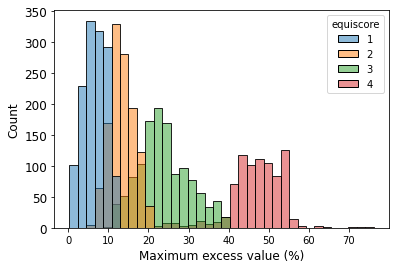

In [520]:
X = df1.copy()

fs = 12

fig, ax = plt.subplots()
sns.histplot(x="max_excess_value", 
             data=X.sort_values(by="equiscore"),  
             hue="equiscore",
             palette="tab10",
            ax=ax)
ax.set_xlabel("Maximum excess value (%)", fontsize=fs)
ax.set_ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
plt.savefig("./graphes/maxexcess_vs_equiscore.png")
plt.show()

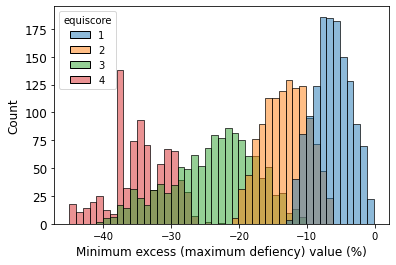

In [521]:
fs = 12

fig, ax = plt.subplots()

sns.histplot(x="min_excess_value", 
             data=X.sort_values(by="equiscore"), 
             bins=int(np.abs(X.min_excess_value).max()), 
             hue="equiscore",
             palette="tab10",
            ax=ax)
ax.set_xlabel("Minimum excess (maximum defiency) value (%)", fontsize=fs)
ax.set_ylabel("Count", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
plt.savefig("./graphes/minexcess_vs_equiscore.png")
plt.show()

**Quelle est la relation entre l'equiscore et le type de macronutriments dont l'exc√®s (la carence) est maximal(e) ? L'equiscore et le type de nutriment en exc√®s sont-ils corr√©l√©s?**

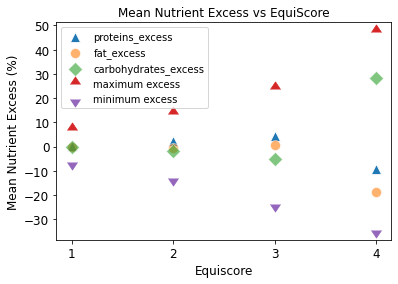

In [522]:
score_groups = X.groupby("equiscore").mean()
fig, ax = plt.subplots()

sns.scatterplot(x="equiscore", y="proteins_excess", data=score_groups, ax=ax, label="proteins_excess", marker="^", s=100)
sns.scatterplot(x="equiscore", y="fat_excess", data=score_groups, ax=ax, label="fat_excess", marker="o", s=100, alpha=0.60)
sns.scatterplot(x="equiscore", y="carbohydrates_excess", data=score_groups, ax=ax, label="carbohydrates_excess", marker="D", s=100, alpha=0.60)
sns.scatterplot(x="equiscore", y="max_excess_value", data = score_groups, ax=ax, label="maximum excess", marker=10, s=100)
sns.scatterplot(x="equiscore", y="min_excess_value", data = score_groups, ax=ax, label="minimum excess", marker=11, s=100)
ax.set_xlabel("Equiscore", fontsize=12)
ax.set_ylabel("Mean Nutrient Excess (%)", fontsize=12)
ax.set_title("Mean Nutrient Excess vs EquiScore", fontsize=12)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticks([1, 2, 3, 4])

plt.legend()

plt.savefig('./graphes/excess_equiscore.png', dpi=300)
plt.show()

Tableau de contingence:


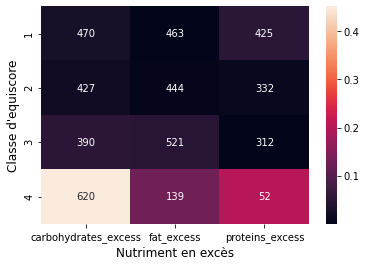

In [523]:
# Cr√©ation du tableau de contingence
x = "equiscore"
y = "max_excess"

cont = X[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = cont.loc["Total", "Total"]
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.ylabel("Classe d'equiscore", fontsize=12)
plt.xlabel("Nutriment en exc√®s", fontsize=12)
print("Tableau de contingence:")
plt.show()

Etant donn√© la valeur tr√®s √©lev√©e de la distance du khi-deux (> 3040), on en d√©duit l'existence d'une corr√©lation entre le type de nutriment le plus en exc√®s et la classe d'equiscore.

En particulier:

- Dans la classe d'equiscore 4 les exc√®s en glucides sont les exc√®s principaux dans 67% des cas
- 40% des produits dont l'exc√®s principal provient des glucides sont des produits de classe 4
- Dans cette m√™me classe d'equiscore (4), les produits dont l'exc√®s principal est un exc√®s en prot√©ines sont particuli√®rement sous-repr√©sent√©s: ils ne repr√©sentent que 9% des produits, tandis qu'ils repr√©sentent 22% des produits toutes cat√©gories confondues.
- Enfin, les produits dont l'exc√®s en prot√©ines est le principal exc√®s sont surrepr√©sent√©s dans le groupe d'equiscore 1: ils repr√©sentent en effet 32% de l'ensemble des produits de classe 1.

La classe 1, associ√©e aux produits les plus √©quilibr√©s par construction, est compos√©e pour 1/3 de produits principalement "surcharg√©s" en lipides, 1/3 en prot√©ines, et 1/3 en glucides.

Tableau de contingence:


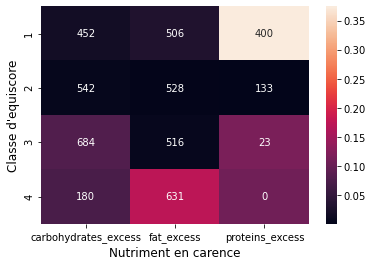

In [524]:
# Cr√©ation du tableau de contingence
x = "equiscore"
y = "min_excess"

cont = X[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = cont.loc["Total", "Total"]
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.ylabel("Classe d'equiscore", fontsize=12)
plt.xlabel("Nutriment en carence", fontsize=12)
print("Tableau de contingence:")
plt.show()

Les produits de forte carence en prot√©ines sont surrepr√©sent√©s dans la classe d'equiscore a, les produits de fortes carences en glucides et lipides le sont dans les classe c et d, respectivement, o√π les produits carenc√©s en prot√©ines sont singuli√®rement sous-repr√©sent√©s.

### II.2.2 Nutriscore et equiscore 

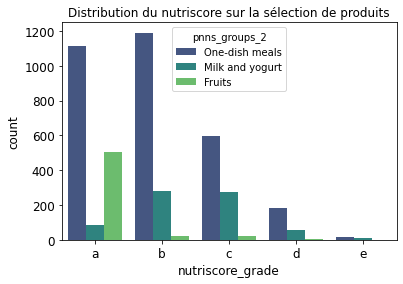

In [577]:
fig, ax = plt.subplots()
sns.countplot(x="nutriscore_grade",
            data=X.sort_values(by="nutriscore_grade"),
             palette="viridis",
             hue="pnns_groups_2",
             ax=ax)
ax.tick_params(axis="both", labelsize=12)
ax.set_xlabel("nutriscore_grade", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.title("Distribution du nutriscore sur la s√©lection de produits")
plt.savefig("./graphes/nutriscore.png", dpi=300)
plt.show()

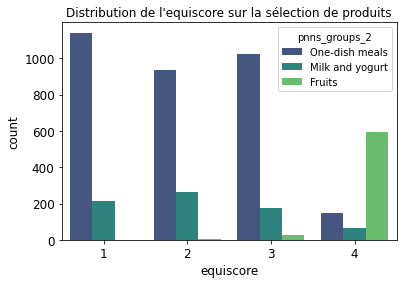

In [579]:
fig, ax = plt.subplots()
sns.countplot(x="equiscore",
            data=X.sort_values(by="equiscore"),
             palette="viridis",
             hue="pnns_groups_2",
             ax=ax)
ax.tick_params(axis="both", labelsize=12)
ax.set_xlabel("equiscore", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.title("Distribution de l'equiscore sur la s√©lection de produits")
plt.savefig("./graphes/equiscore.png", dpi=300)
plt.show()

### II.2.3 Analyse crois√©e des scores

Il s'agit ici de regarder comment ces deux scores sont corr√©l√©s entre eux ou non. L'id√©e de l'application repose sur l'hypoth√®se que le nutriscore seul ne suffit pas pour s√©lectionner des produits dont la r√©partition des divers macronutriments se rapproche des ANC.

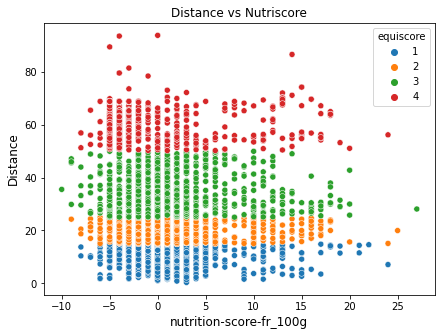

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="nutrition-score-fr_100g",
                y="score",
                data=X.sort_values(by="equiscore"),
                hue="equiscore",
                palette="tab10"
               )
plt.title("Distance vs Nutriscore")
plt.xlabel("nutrition-score-fr_100g", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.savefig("./graphes/equiscore_nutriscore.png", dpi=300)
plt.show()

**Test d'ind√©pendance distance (equiscore) vs. nutriscore par ANOVA**

Commen√ßons par afficher les distribution des distances associ√©es √† chaque nutriscore sous forme de boxplots

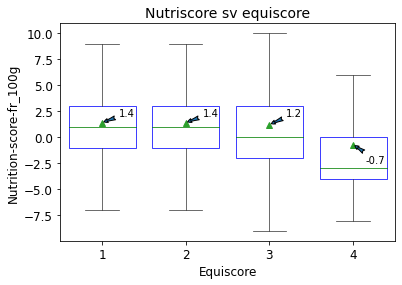

equiscore
1    1.410948
2    1.410760
3    1.224437
4   -0.694938
Name: nutrition-score-fr_100g, dtype: float64


In [573]:
boxprops = {"facecolor":"white", "edgecolor":"blue"}
medianprops = {"color": "green"}
means = X.groupby("equiscore").mean()["nutrition-score-fr_100g"]
fs = 12
fig, ax = plt.subplots()
sns.boxplot(x="equiscore", 
            y="nutrition-score-fr_100g",
            data=X.sort_values(by="equiscore"),
            showmeans=True, 
            showfliers=False,
            boxprops=boxprops,
            medianprops=medianprops,
            linewidth=0.75
           )
ax.set_xlabel("Equiscore", fontsize=fs)
ax.set_ylabel("Nutrition-score-fr_100g", fontsize=fs)
ax.tick_params(axis='y', labelsize=fs)
ax.tick_params(axis="x", labelsize=fs)
ax.set_title("Nutriscore sv equiscore", fontsize=14)
plt.annotate("{:.1f}".format(means.iloc[0]), xy=(0, means.iloc[0]), xytext=(0.2, 2), arrowprops=arrowprops)
plt.annotate("{:.1f}".format(means.iloc[1]), xy=(1, means.iloc[1]), xytext=(1.2, 2), arrowprops=arrowprops)
plt.annotate("{:.1f}".format(means.iloc[2]), xy=(2, means.iloc[2]), xytext=(2.2, 2), arrowprops=arrowprops)
plt.annotate("{:.1f}".format(means.iloc[3]), xy=(3, means.iloc[3]), xytext=(3.15, -2.45), arrowprops=arrowprops)
plt.savefig("./graphes/nutriscore_equiscore.png", dpi=300)
plt.show()


print(means)

Difficile de comprendre exactement ce qu'il se passe ici. Affichons la distribution des nutrition score sour forme d'histogramme.

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Count'>

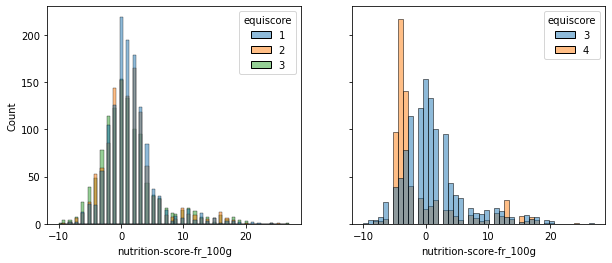

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)

sns.histplot(x="nutrition-score-fr_100g", data=X[X.equiscore.isin([1, 2, 3])], hue="equiscore", palette="tab10", ax=ax1)
sns.histplot(x="nutrition-score-fr_100g", data=X[X.equiscore.isin([3, 4])], hue="equiscore", palette="tab10", ax=ax2)

Hypoth√®se: Les variables nutriscore et equiscore sont ind√©pendantes pour les groupes d'equiscore 1, 2 et 3. En revanche, appartenir √† la classe d'equiscore 4 est un marqueur pour le nutriscore

In [30]:
y = df1.copy()
y.rename(columns={"nutrition-score-fr_100g":"nutriscore_score"}, inplace=True)
mod = ols('nutriscore_score ~ equiscore', data=y[y.equiscore.isin([1, 2, 3])].dropna(subset=["nutriscore_score", "equiscore"], how="any")).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("R√©sultats de l'ANOVA pour les variables equiscore et nutrition-score-fr_100g:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

R√©sultats de l'ANOVA pour les variables equiscore et nutrition-score-fr_100g:
F: 1.04, p: 0.307
Eta-squared: 0.0003


L'ANOVA sur les classes d'equiscore 1 √† 3 confirme notre hypoth√®se. ANOVAs sur 4 vs. les autres classes.

In [31]:
y_4 = y[y.equiscore==4].copy()
y_4.loc[:, "id"] = np.full((y_4.shape[0], 1), 4)
y_o = y[y.equiscore!=4].copy()
y_o.loc[:, "id"] = np.full((y_o.shape[0], 1), 0)

In [32]:
yy = pd.concat([y_4, y_o])
mod = ols('nutriscore_score ~ id', data=yy.dropna(subset=["nutriscore_score", "id"], how="any")).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("R√©sultats de l'analyse ANOVA pour les variables score et nutriscore_grade:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

R√©sultats de l'analyse ANOVA pour les variables score et nutriscore_grade:
F: 119.27, p: 0.000
Eta-squared: 0.0267


ANOVA sur equiscore 4 vs. autres equiscores confirme la singularit√© de la classe 4 vis-√†-vis des autres classes (en termes de nutriscore)

### II.2.4 Exemples

Exemple de produits de nutriscore a et d'equiscore 4

In [34]:
X.loc[(X.equiscore==4) & (X.nutriscore_grade=="a"), ["product_name","fat_excess", "carbohydrates_excess", "proteins_excess", "fiber_kcal"]].sample(10)

product_name  fat_excess  \
7492  Pur√©e Pommes Mangues Sans sucres ajout√©s* *Con...  -27.752708   
4614                                      Ceviches Thon  -29.243119   
1879  Compot' Pomme - All√©g√©e en sucres - 30% de suc...  -37.500000   
5692                          Velout√© de Pommes Mangues  -28.982650   
862   POM'POTES SSA Pomme/Pomme Fraise/Pomme Framboi...  -28.409091   
1312  Compote Pomme, Mangue Et Passion All√©g√©e En Su...  -36.104651   
185                        5 fruits sans sucres ajout√©s  -30.733083   
8564                        Compot√©e p√™chesüçë & abricots  -34.051724   
3106                          Cocktail de fruits rouges  -37.500000   
3165                           Filet de merlu blanc MSC  -18.075540   

      carbohydrates_excess  proteins_excess  fiber_kcal  
7492             41.642599       -13.889892      2.2230  
4614            -43.331943        72.575063      0.6650  
1879             55.000000       -17.500000      2.9070  
5692             43.328076       -14.345426      3.1331  
862              42.542088       -14.132997      2.3940  
1312             51.744186       -15.639535      5.9280  
185              45.225564       -14.492481      2.3940  
8564             46.954023       -12.902299      4.6930  
3106             41.486486        -3.986486     11.4000  
3165            -45.000000        63.075540      1.1875

Exemples de produits de nutriscore d ou e, et d'equiscore 1

In [35]:
X.loc[(X.equiscore==1) & ((X.nutriscore_grade=="d") | (X.nutriscore_grade=="e")), ["product_name","fat_excess", "carbohydrates_excess", "proteins_excess", "fiber_kcal"]].sample(10)

product_name  fat_excess  \
7316                         Cr√™pes fourrage au chocolat    5.396051   
4494                         Cr√™pes fourr√©es au chocolat    4.438490   
8233                                   Feuillet√©s ch√®vre    9.039379   
4802   2 pastillas poulet, bloc foie gras canard, fru...    9.487952   
5475               2 Tartines Fromage Saucisses Moutarde    7.650502   
3885                                 6 crepes au fromage    6.449044   
10333               4 Original bun's poulet roti et thym    8.262712   
8090                                  50 Mini feuillet√©s    6.661278   
10323                    Original Bun's 4 Jambon Ketchup   -2.096273   
3718                                Ravioles du Dauphin√©   -4.438776   

       carbohydrates_excess  proteins_excess  fiber_kcal  
7316               5.839764       -11.235815      1.5200  
4494               7.190121       -11.628611      0.3990  
8233              -2.040573        -6.998807      1.1400  
4802              -9.658635         0.170683      5.5100  
5475              -4.866221        -2.784281      4.6930  
3885              -4.660297        -1.788747      0.8550  
10333             -5.075330        -3.187382      5.7000  
8090               2.318372        -8.979650      1.0032  
10323              3.033126        -0.936853      3.8000  
3718               1.307978         3.130798      5.9280

Produit d'equiscore maximum

In [36]:
X.loc[X.score.idxmax(), ["product_name",
                          "pnns_groups_2", 
                          "energy-kcal_100g",
                          "score",
                          "fat_excess", 
                          "carbohydrates_excess", 
                          "proteins_excess",
                        "nutriscore_grade"]]

product_name            B√¢tonnets de filets de colin d'Alaska coup√©s
pnns_groups_2                                         One-dish meals
energy-kcal_100g                                                  85
score                                                        93.8078
fat_excess                                                  -31.1768
carbohydrates_excess                                             -45
proteins_excess                                              76.1768
nutriscore_grade                                                   b
Name: 317, dtype: object

Produit d'equiscore minimum

In [37]:
X.loc[X.score.idxmin(), ["product_name",
                          "pnns_groups_2", 
                          "energy-kcal_100g",
                          "score",
                          "fat_excess", 
                          "carbohydrates_excess", 
                          "proteins_excess", 
                         "nutriscore_grade"]]

product_name            Risotto aux Saint-Jacques, petits l√©gumes, sau...
pnns_groups_2                                              One-dish meals
energy-kcal_100g                                                      115
score                                                            0.334046
fat_excess                                                     -0.0994695
carbohydrates_excess                                             0.269673
proteins_excess                                                 -0.170203
nutriscore_grade                                                        c
Name: 4933, dtype: object

Le produit d'equiscore maximal est un filet de poisson: presque uniquement des prot√©ines, tr√®s peu de graisses ou de glucides. Le produit d'equiscore minimal est un plat de Risotto: une combinaison de legumes et de fruits de mer ramenant les exc√®s √† des valeurs proches de 0.

Ces quelques explorations illustrent la compl√©mentarit√© des deux scores.

### II.2.5 Nutriments en exc√®s/carence dans les groupes d'aliments

Au vu des r√©sultats obtenus jusqu'ici, on peut se demander comment l'equiscore est associ√© √† la pr√©sence de telle ou telle cat√©gorie de nutriment. En th√©orie, un produit peut contenir n'importe quelle combinaison de macronutriments, et ainsi un equiscore √©lev√© peut correspondre √† des produits pr√©sentant des carences en n'importe qu'elle cat√©gorie de macronutriment, et des surplus dans les autres. Mais qu'en est-il en pratique sur notre jeu de donn√©es? Peut-on associer un groupe d'aliment √† un exc√®s/carence dans un (plusieurs) macronutriment(s) particulier(s)?

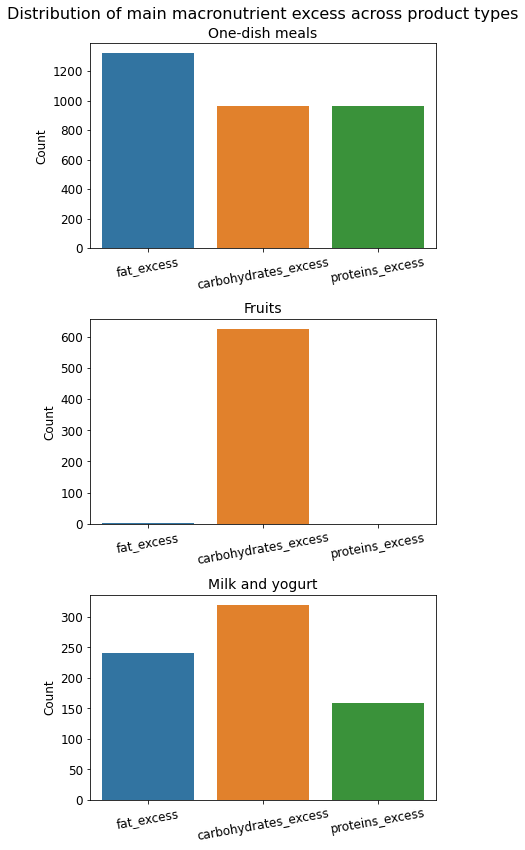

In [590]:
fs = 12
fig, axs = plt.subplots(nrows=X.pnns_groups_2.unique().size, figsize=(8, 12))
fig.suptitle("Distribution of main macronutrient excess across product types", fontsize=16)
for i, g in enumerate(X.pnns_groups_2.unique()):
    ax = axs[i]
    sns.countplot(x="max_excess", 
                  data=X[X.pnns_groups_2==g].sort_values(by="max_excess"), 
                  ax=ax,
                  order=["fat_excess", "carbohydrates_excess", "proteins_excess"],
                 )
    ax.set_xlabel("", fontsize=fs)
    ax.set_ylabel("Count", fontsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.tick_params(axis="x", labelsize=fs, labelrotation=10)
    ax.set_title(g, fontsize=14)
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.2, right=0.8)
plt.savefig("./graphes/excess_foodgroups.png", dpi=300)
plt.show()

On a donc les associations suivantes:
- Les one-dish meals, les exc√®s sont principalement des exc√®s en lipides, puis en prot√©ines et enfin en glucides
- Pour les fruits, les exc√®s sont essentiellement des exc√®s en glucides (les fruits sont des produits non gras, et ne contiennent pas ou peu de prot√©ines)
- Enfin pour les milk and yogurt on a en premier lieu des exc√®s en glucides (surement √† cause des desserts sucr√©s), puis viennent les lipides et enfin les prot√©ines.

# Conclusion

Le principe de fonctionnement repose essentiellement sur l'equiscore, qui permet de calculer l'√©cart d'une composition d'un produit √† la composition id√©ale. Pour que l'application puisse fonctionner, il faut pouvoir "√©quilibrer" les apports d'un plat, avec les apports d'un autre plat. Or nous avons vu que les One-dish meals, les Fruits et les Milk and yogurt sont chacuns "sp√©cialis√©s" dans un ou plusieurs macro-nutriment:
- les lipides et prot√©ines en ce qui concerne les One-dish meals
- les glucides en ce qui concerne les fruits
- les glucides et les lipides en ce qui concerne les Milk and yogurt

Pour aller plus loin, on pourrait par exemple selectionner al√©atoirement un one-dish meal, et √† partir de sa composition d√©cider si il faut lui adjoindre un fruit (carence en glucides) ou un yaourt (carence en lipides et/ou prot√©ines) pour retrouver une meilleure composition. Il s'agira ensuite de calculer le nouvel equiscore et v√©rifier qu'il est bien inf√©rieur au score initial. Enfin r√©p√©ter cette op√©ration un grand nombre de fois et v√©rifier √† l'aide d'un test statistique appropri√© qu'on obtient obtient en moyenne de meilleurs equiscores avec les combinaisons propos√©es par l'app que sans l'app.

# -----------------------------------------------------------------

D√©monstration de la pertinence d'utiliser une mesure de l'√©quilibre nutritionnel dans le cadre de l'application

In [526]:
X = df1.drop(columns=["energy-kcal_100g", "fat_100g", "carbohydrates_100g", "proteins_100g", "fiber_100g"]).copy()
np.random.seed(42)

# Cr√©ation des datframe correspondants aux pnns groups
one_dish_meals = X[X.pnns_groups_2=="One-dish meals"]
fruits = X[X.pnns_groups_2=="Fruits"]
milk_yogurt  = X[X.pnns_groups_2=="Milk and yogurt"]
other = pd.concat([fruits, milk_yogurt])

# variables
nutri_vars = ["fat_kcal", 
              "carbohydrates_kcal", 
              "proteins_kcal"]
dessert_dict = {"random":0, "partial_random":1, "w_equiscore":2}

start_scores = []
nb_tirages = 1000
combinations = np.empty((nb_tirages+2, 7))
indexes = np.empty((nb_tirages, 4))

def add_food(base, dessert, dessert_type, dessert_dict, nutri_vars=nutri_vars):
    added = np.empty((1, 7))
    for i, nv in enumerate(nutri_vars):
        added[0, i] = base[nv].to_numpy() + dessert[nv].to_numpy()
    added[0, 3] = dessert_dict[dessert_type]
    added[0, 4] = base.index[0]
    added[0, 5] = dessert.index[0]
    added[0, 6] = base.score.iloc[0]
    return added
    
for i in range(0, nb_tirages, 3):
    # S√©lection al√©atoire d'un plat
    base_product = one_dish_meals.sample(1)
    #start_scores.append(base_product.score.iloc[0])

    # S√©lection d'un produit parmi "other"
    dessert_random = other.sample(1)
    added = add_food(base_product, dessert_random, "random", dessert_dict)
    combinations[i] = added

    # S√©lection d'un produit parmi "fruits" ou "milk_yogurt selon la valeur de base_product["max_excess"]
    if (base_product["max_excess"].to_numpy()[0].count("fat")!=0) or (base_product["max_excess"].to_numpy()[0].count("proteins")!=0):
        dessert_partial_random = fruits.sample(1)
        added = add_food(base_product, dessert_partial_random, "partial_random", dessert_dict)
        #combinations_partial_random[i] = added
       # start_scores.append(base_product.score.iloc[0])
    else:
        dessert_partial_random = milk_yogurt.sample(1)
        added = add_food(base_product, dessert_partial_random, "partial_random", dessert_dict)
        start_scores.append(base_product.score.iloc[0])
    combinations[i+1] = added

    
    # S√©lection d'un produit parmi "fruits" ou "milk_yogurt" selon la valeur de base_product["max_excess"]
    # et appartenant au m√™me groupe d'equiscore
    base_equiscore = base_product.equiscore.to_numpy()[0]
    if (base_product["max_excess"].to_numpy()[0].count("fat")!=0) or (base_product["max_excess"].to_numpy()[0].count("proteins")!=0):
        dessert_w_equiscore = fruits[fruits.equiscore==min(4, base_equiscore+1)].sample(1)
        added = add_food(base_product, dessert_w_equiscore, "w_equiscore", dessert_dict)
        #combinations_w_equiscore[i] = added
        #start_scores.append(base_product.score.iloc[0])
    else:
        dessert_w_equiscore = milk_yogurt[milk_yogurt.equiscore==base_equiscore].sample(1)
        added = add_food(base_product, dessert_w_equiscore, "w_equiscore", dessert_dict)
        #combinations_w_equiscore[i] = added
        #start_scores.append(base_product.score.iloc[0])
    combinations[i+2] = added
    
    # R√©cup√®re les index des base_product, fruits et/ou milky_yogurt s√©lectionn√©s √† chaque tour
    try:
        indexes[i, :] = [base_product.index[0], 
                   dessert_random.index[0],
                   dessert_partial_random.index[0],
                   dessert_w_equiscore.index[0]]
    except:
        print(dessert_w_equiscore)


combinations = pd.DataFrame(combinations, columns=["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "combination_type", "dish_index", "dessert_index", "start_score"])

sum_all = combinations[["fat_kcal","carbohydrates_kcal","proteins_kcal"]].sum(axis=1)
combinations["fat_ratio"] = 100*combinations["fat_kcal"]/sum_all
combinations["carbohydrates_ratio"] = 100*combinations["carbohydrates_kcal"]/sum_all
combinations["proteins_ratio"] = 100*combinations["proteins_kcal"]/sum_all

# calcul du score
combinations["score"] = fp3.score(combinations["fat_ratio"], combinations["carbohydrates_ratio"], combinations["proteins_ratio"], method="sq")

# start_scores
#combinations["start_score"] = start_scores

# score_difference
combinations["score_difference"] = combinations["start_score"] - combinations["score"]

# format integer
indexes = indexes.astype("int")
combinations[["combination_type", "dish_index", "dessert_index"]] = combinations[["combination_type",
                                                                                  "dish_index", 
                                                                                  "dessert_index"]].astype("int")

combinations.head()

fat_kcal  carbohydrates_kcal  proteins_kcal  combination_type  dish_index  \
0   219.375              208.10         125.10                 0        8049   
1   187.200              262.40         108.80                 1        8049   
2   241.200              253.60         108.80                 2        8049   
3    75.420               86.56          19.52                 0        2815   
4    76.140               84.96          19.44                 1        2815   

   dessert_index  start_score  fat_ratio  carbohydrates_ratio  proteins_ratio  \
0           3301     7.489506  39.700493            37.660046       22.639461   
1           2992     7.489506  33.524355            46.991404       19.484241   
2           8541     7.489506  39.960239            42.014579       18.025182   
3           6807    27.634497  41.553719            47.691460       10.754821   
4           7937    27.634497  42.173480            47.058824       10.767697   

      score  score_difference  
0  9.226654         -1.737148  
1  4.869153          2.620353  
2  3.904014          3.585492  
3  8.317093         19.317404  
4  8.450093         19.184404

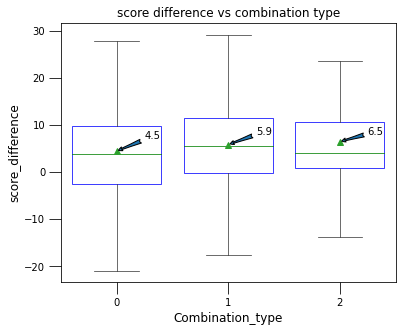

In [557]:
fig, ax1 = plt.subplots(figsize=(6, 6))

boxprops = {"facecolor":"white", "edgecolor":"blue"}
medianprops = {"color": "green"}
#arrowprops = {"arrowstyle":"fancy"}
sns.boxplot(data=combinations,
            y = "score_difference",
            x = "combination_type",
            ax=ax1,
            linewidth=0.75, 
            boxprops=boxprops, 
            medianprops=medianprops,
            showfliers=False,
            showmeans=True)
ax1.tick_params(axis="both", size=12)
ax1.set_xlabel("Combination_type", fontsize=12)
ax1.set_ylabel("score_difference", fontsize=12)
ax1.set_title("score difference vs combination type")

#plt.axhline(start_scores[0], 0,1)
means = combinations.groupby("combination_type").mean()["score_difference"]
plt.annotate("{:.1f}".format(means.iloc[0]), xy=(0, means.iloc[0]), xytext=(0.25, 7), arrowprops=arrowprops)
plt.annotate("{:.1f}".format(means.iloc[1]), xy=(1, means.iloc[1]), xytext=(1.25, 8), arrowprops=arrowprops)
plt.annotate("{:.1f}".format(means.iloc[2]), xy=(2, means.iloc[2]), xytext=(2.25, 8), arrowprops=arrowprops)
plt.gcf().subplots_adjust(bottom=0.3, top=0.9)
plt.savefig("./graphes/scorediff_combtype.png", dpi=300)
plt.show()

In [528]:
combinations.groupby("combination_type").mean()["score_difference"]

combination_type
0    4.502874
1    5.881169
2    6.505367
Name: score_difference, dtype: float64

In [558]:
groups_01 = combinations[combinations.combination_type.isin([0, 1])].dropna(subset=["combination_type", "score"], how="any")

mod = ols('score_difference ~ combination_type', data=groups_01).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("R√©sultats de l'analyse ANOVA pour les variables score et combination_type:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

R√©sultats de l'analyse ANOVA pour les variables score et combination_type:
F: 2.37, p: 0.124
Eta-squared: 0.0035


In [497]:
groups_2 = combinations[combinations.combination_type.isin([0, 2])].dropna(subset=["combination_type", "score"], how="any")
mod = ols('score_difference ~ combination_type', data=groups_2).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("R√©sultats de l'analyse ANOVA pour les variables score et combination_type:")
print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
print("Eta-squared: {:.4f}".format(esq_sm))

R√©sultats de l'analyse ANOVA pour les variables score et combination_type:
F: 6.14, p: 0.013
Eta-squared: 0.0091
